AirScraper API

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import dotenv

dotenv.load_dotenv()

True

In [2]:
# Path
import sys
sys.path.append('../')

In [3]:
from src.support_flights import get_flight_info

Let's star by departure flights. Since we are going to go on the 21-22-23 of December of 2024 and return 27-28-29

Let’s take the following considerations into account:

- Since we are creating experiences for one person only, we are looking for a single flight seat.

- We are committed to the environment, so we only select low-emission flights.

- We also try to offer affordable fares, so we focus on economic seats.

In [56]:
departure_dates = [f"2024-12-{i}" for i in range(21,24)]
return_dates = [f"2024-12-{i}" for i in range(27,30)]

departure = "MAD"
arrival = ["BCN", "BUD"]

Departure flights

In [5]:
df_list_dep = []

for arr in arrival:

    for date in departure_dates:

        df_list_dep.append(get_flight_info("MAD", arr, date))

df_departures = pd.concat(df_list_dep)

In [6]:
df_departures.head()

,Departure Airport,Departure ID,Departure time,Arrival Airport,Arrival ID,Arrival time,Airplane,Airline,Legroom (cm),Actual emisions,Typical emissions,Difference emissions (%),Price
0,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-21 07:30,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-21 08:55,Boeing 787,Air Europa,79 cm,53000,62000,-15,42
1,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-21 15:10,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-21 16:35,Boeing 787,Air Europa,79 cm,53000,62000,-15,105
0,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-22 15:10,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-22 16:35,Boeing 787,Air Europa,79 cm,53000,62000,-15,132
0,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-23 07:30,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-23 08:55,Boeing 787,Air Europa,79 cm,53000,62000,-15,54
0,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-21 20:35,Aeropuerto de Budapest-Ferenc Liszt,BUD,2024-12-21 23:40,Boeing 737MAX 8 Passenger,Ryanair,71 cm,131000,209000,-37,112


In [7]:
df_departures.to_csv("../data/departure_flights.csv", index = False)

In [8]:
df_list_ret = []

for arr in arrival:
    
    for date in return_dates:

        df_list_ret.append(get_flight_info(arr, "MAD", date))

df_returns = pd.concat(df_list_ret)

No flighs from BCN to MAD on 2024-12-29


In [10]:
df_returns.to_csv("../data/return_flights.csv", index = False)

In [14]:
df_final = pd.concat([df_departures, df_returns])
df_final.to_csv("../data/all_flights.csv", index = False)

---

In [24]:
df_final = pd.read_csv("../data/all_flights.csv")

In [17]:
df_final.head()

,Departure Airport,Departure ID,Departure time,Arrival Airport,Arrival ID,Arrival time,Airplane,Airline,Legroom (cm),Actual emisions,Typical emissions,Difference emissions (%),Price
0,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-21 07:30,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-21 08:55,Boeing 787,Air Europa,79 cm,53000,62000,-15,42
1,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-21 15:10,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-21 16:35,Boeing 787,Air Europa,79 cm,53000,62000,-15,105
2,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-22 15:10,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-22 16:35,Boeing 787,Air Europa,79 cm,53000,62000,-15,132
3,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-23 07:30,Aeropuerto Josep Tarradellas Barcelona-El Prat,BCN,2024-12-23 08:55,Boeing 787,Air Europa,79 cm,53000,62000,-15,54
4,Aeropuerto Adolfo Suárez Madrid-Barajas,MAD,2024-12-21 20:35,Aeropuerto de Budapest-Ferenc Liszt,BUD,2024-12-21 23:40,Boeing 737MAX 8 Passenger,Ryanair,71 cm,131000,209000,-37,112


The dataset obtained contains the following information:

- `Departure and Arrival Airports`: The names and codes (IATA) of the airports where the flight departs and arrives.
- `Departure and Arrival Times`: The date and time of the flight’s departure and arrival.
- `Airplane`: The aircraft model used for the flight.
- `Airline`: The airline operating the flight.
- `Legroom`: Space available for passengers' legs, measured in centimeters.
- `Emissions`: Actual and typical CO2 emissions for the flight, along with the percentage difference.
- `Price`: The ticket price for the flight in EUR.

In [25]:
# We can build a new column that says if the flight is related to Budapest or Barcelona
df_final['Target City'] = df_final.apply(lambda row: 'BCN' if 'BCN' in [row['Departure ID'], row['Arrival ID']] 
                                    else 'BUD' if 'BUD' in [row['Departure ID'], row['Arrival ID']] 
                                    else 'Other', axis=1)

We can compare Budapest and Barcelona

In [33]:
df_final.groupby('Target City')['Price'].describe().T

Target City,BCN,BUD
count,6.000000,21.000000
mean,99.666667,179.952381
std,56.073761,73.190489
min,42.000000,89.000000
25%,58.750000,121.000000
50%,89.000000,160.000000
75%,125.250000,240.000000
max,192.000000,301.000000


Generally, we have more options to fly to Budapest rather than Barcelona, however Barcelona is generally cheaper. This makes sense since Budapest is way further away from Madrid than Barcelona.

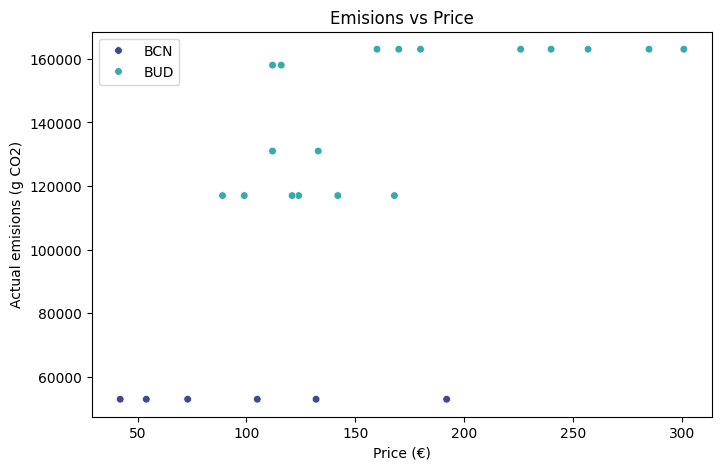

In [55]:
# We build a scatterplot to compare emisions vs price
plt.figure(figsize = (8, 5))

sns.scatterplot(x = "Price",
                y = "Actual emisions",
                data = df_final,
                hue = "Target City",
                palette= "mako",
                s = 30)

plt.xlabel("Price (€)")
plt.ylabel("Actual emisions (g CO2)")
plt.title("Emisions vs Price")
plt.legend()
plt.show()

In [65]:
df_airlines = df_final.groupby(['Target City','Airline'])['Actual emisions'].mean().reset_index()

In [66]:
df_airlines

,Target City,Airline,Actual emisions
0,BCN,Air Europa,53000.0
1,BUD,Iberia,163000.0
2,BUD,Ryanair,144500.0
3,BUD,Wizz Air,117000.0


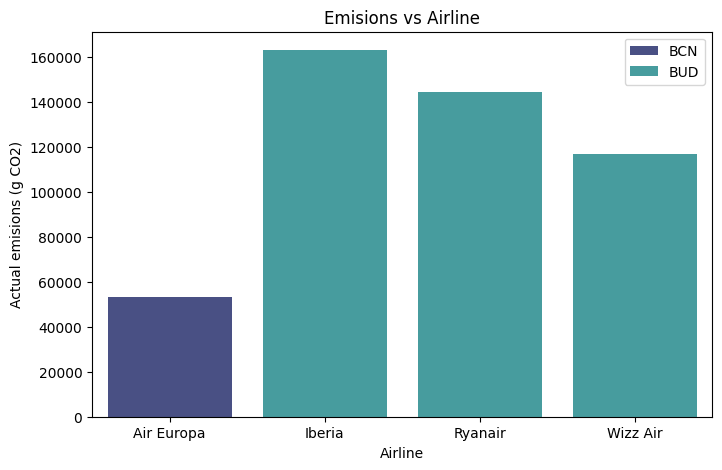

In [69]:
plt.figure(figsize = (8, 5))

sns.barplot(x = "Airline",
                y = "Actual emisions",
                data = df_airlines,
                hue = "Target City",
                palette= "mako"
                )

plt.xlabel("Airline")
plt.ylabel("Actual emisions (g CO2)")
plt.title("Emisions vs Airline")
plt.legend()
plt.show()

Air Europa only operates on the Madrid-Barcelona route, so it is logical that it has lower emissions. Iberia, Ryanair, and Wizz Air operate Madrid-Budapest flights, with Wizz Air being the least polluting.